# Screenplay Genre Classification

## EDA Part I

In [ ]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/cleaned_data.csv", index_col=[0])

In [3]:
data.head()

,title,text,genre,genre_amount,Crime,Romance,Animation,SciFi,Fantasy,History,...,War,Thriller,Mystery,Documentary,Horror,Family,Adventure,Music,Comedy,Western
0,Domino,b'D O M I N O\r\n...,"['Thriller', 'Action', 'Crime']",3,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Knocked Up,b'KNOCKED UP\r\n\r\nWritten by\r\n\r\nJudd Apa...,"['Comedy', 'Romance', 'Drama']",3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10 Things I Hate About You,b'TEN THINGS I HATE ABOUT YOU\r\n\r\nwritten b...,"['Comedy', 'Romance', 'Drama']",3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10000 B C,"b""10,000 B.C.\r\nby\r\nRoland Emmerich & Haral...","['Adventure', 'Action', 'Drama', 'Fantasy']",4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,12 And Holding,b'12 AND HOLDING\r\n\r\nWritten by\r\n\r\nAnth...,['Drama'],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2124
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1968 non-null   object
 1   text          1968 non-null   object
 2   genre         1968 non-null   object
 3   genre_amount  1968 non-null   int64 
 4   Crime         1968 non-null   int64 
 5   Romance       1968 non-null   int64 
 6   Animation     1968 non-null   int64 
 7   SciFi         1968 non-null   int64 
 8   Fantasy       1968 non-null   int64 
 9   History       1968 non-null   int64 
 10  Action        1968 non-null   int64 
 11  Drama         1968 non-null   int64 
 12  War           1968 non-null   int64 
 13  Thriller      1968 non-null   int64 
 14  Mystery       1968 non-null   int64 
 15  Documentary   1968 non-null   int64 
 16  Horror        1968 non-null   int64 
 17  Family        1968 non-null   int64 
 18  Adventure     1968 non-null   int64 
 19  Music 

In [5]:
data.describe()

,genre_amount,Crime,Romance,Animation,SciFi,Fantasy,History,Action,Drama,War,Thriller,Mystery,Documentary,Horror,Family,Adventure,Music,Comedy,Western
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,2.483232,0.159045,0.158537,0.046748,0.129065,0.098577,0.048272,0.219004,0.498476,0.036077,0.267276,0.104167,0.022866,0.135163,0.063008,0.153455,0.028455,0.291667,0.015244
std,1.027197,0.365811,0.365336,0.211152,0.335357,0.298169,0.214396,0.413676,0.500125,0.186530,0.442650,0.305554,0.149514,0.341984,0.243039,0.360517,0.166312,0.454645,0.122553
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#creating genre list
genre_list = list(data.columns[-18:])

In [14]:
#gathering genre sums into a dict
genre_sum_dct = {}

for i in genre_list:
    genre_sum_dct[i] = data[i].sum()

In [22]:
#converting dict into a series to sort values
genre_sum_series = pd.Series(genre_sum_dct).sort_values(ascending=False)

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


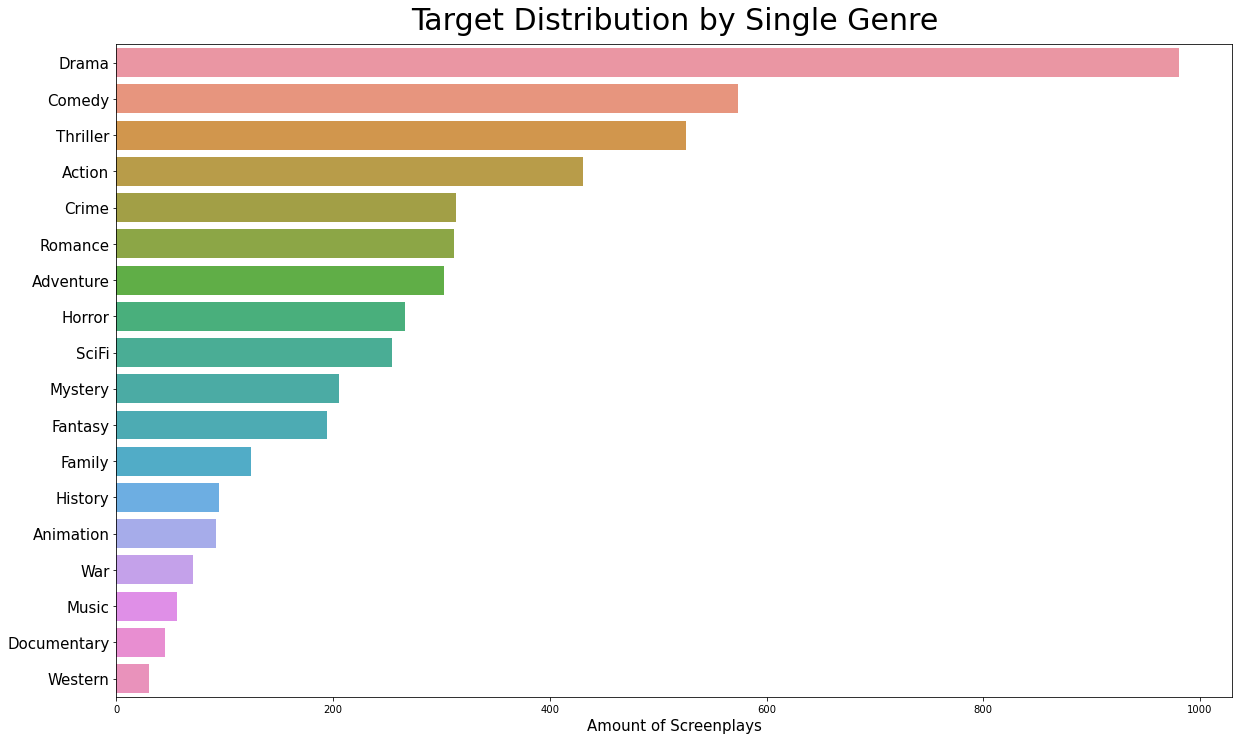

In [39]:
#plotting target distribution by single genre
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(genre_sum_series.values, list(range(len(genre_sum_series))), orient='h', ax=ax)
ax.set_yticks(list(range(len(genre_sum_series))))
ax.set_yticklabels(genre_sum_series.index, fontsize=15)

ax.set_title('Target Distribution by Single Genre', fontsize=30, pad=15)
ax.set_xlabel('Amount of Screenplays', fontsize=15)


plt.show()

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


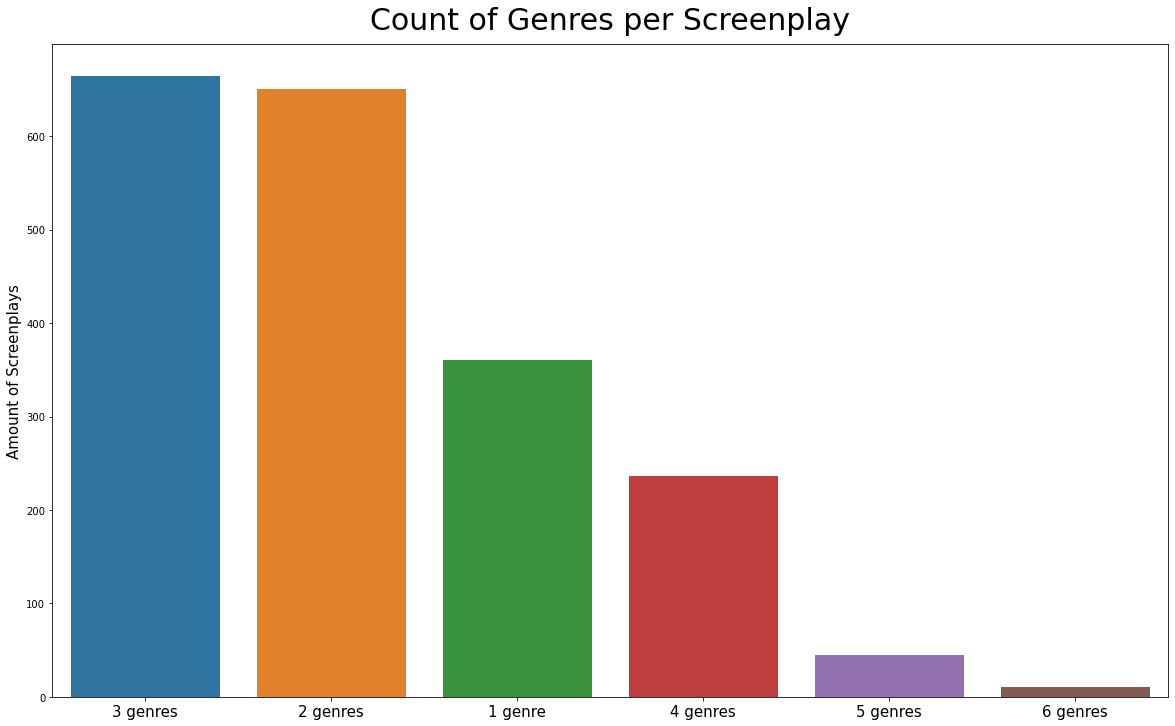

In [52]:
#plotting amount of genres per screen play count

fig, ax = plt.subplots(figsize=(20,12))

sns.barplot([0,1,2,3,4,5], data.genre_amount.value_counts(), ax=ax)

ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["{} genres".format(x) if x != 1 else "{} genre".format(x) for x in data.genre_amount.value_counts().index], fontsize=15)
ax.set_ylabel("Amount of Screenplays", fontsize=15)

ax.set_title("Count of Genres per Screenplay", fontsize=30, pad=15)

plt.show()


C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


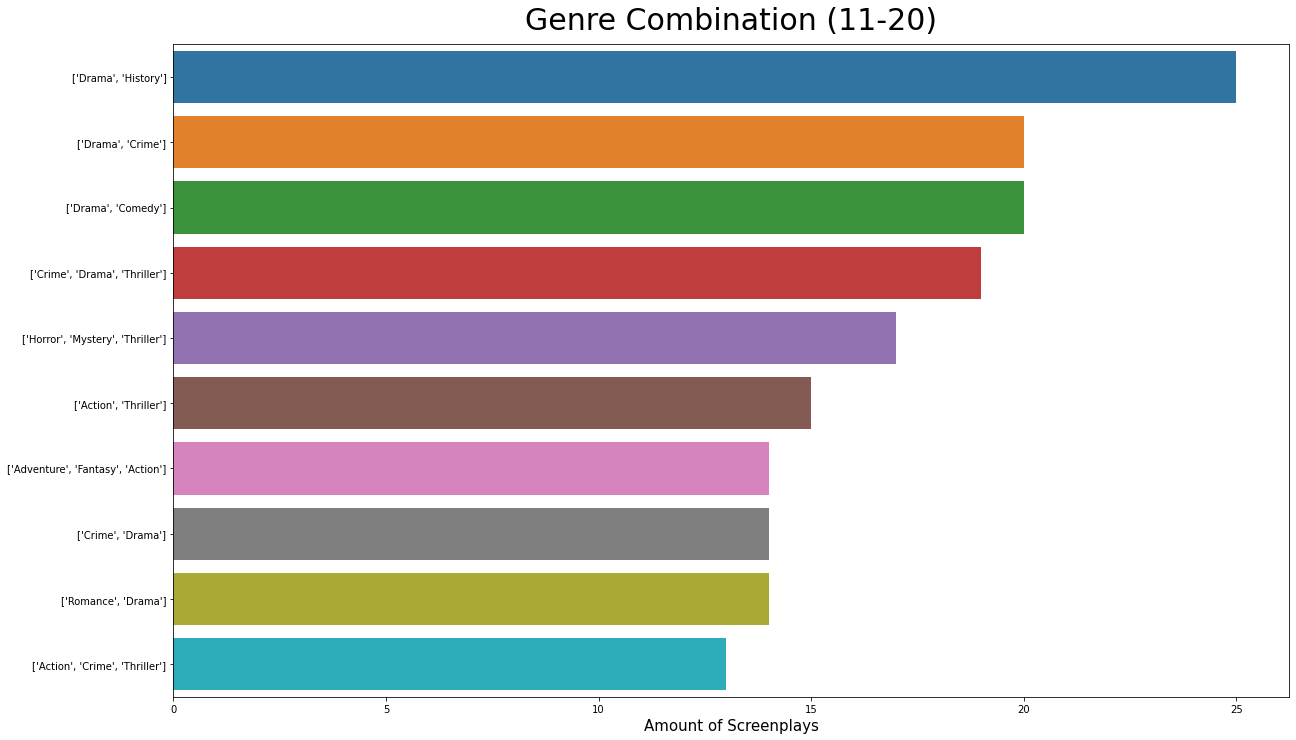

In [63]:
#plotting 11-20 combination by count
twenty_combo = data.genre.value_counts()[10:20]
twenty_combo_idx = data.genre.value_counts()[10:20].index

fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(twenty_combo, list(range(len(twenty_combo_idx))), orient='h', ax=ax)

ax.set_yticks(list(range(len(twenty_combo_idx))))
ax.set_yticklabels(twenty_combo_idx)

ax.set_title('Genre Combination (11-20)', fontsize=30, pad=15)
ax.set_xlabel('Amount of Screenplays', fontsize=15)

plt.show()

C:\Users\mikey\anaconda3\envs\contest_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


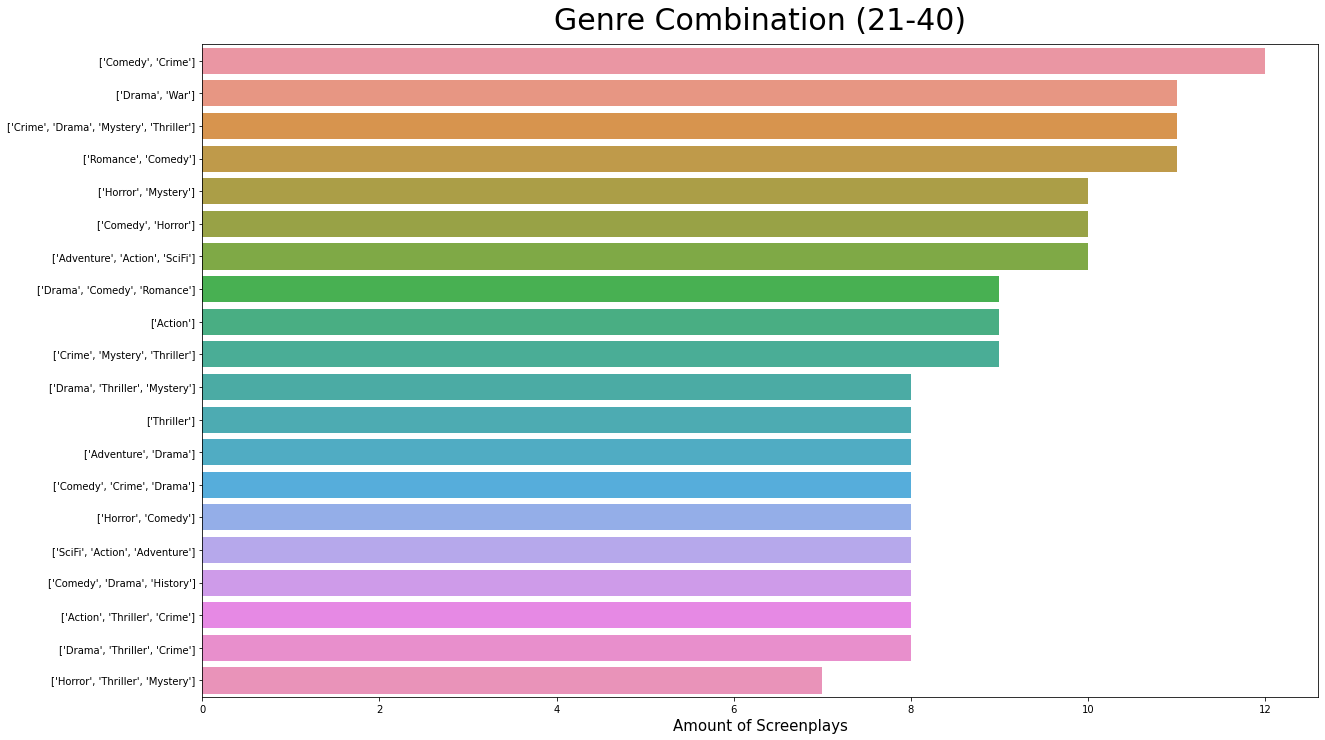

In [64]:
#plotting 21-40 combination by count
forty_combo = data.genre.value_counts()[20:40]
forty_combo_idx = data.genre.value_counts()[20:40].index

fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(forty_combo, list(range(len(forty_combo_idx))), orient='h', ax=ax)

ax.set_yticks(list(range(len(forty_combo_idx))))
ax.set_yticklabels(forty_combo_idx)

ax.set_title('Genre Combination (21-40)', fontsize=30, pad=15)
ax.set_xlabel('Amount of Screenplays', fontsize=15)

plt.show()

#### Overall, there is clearly a lot of different genre comibnations, where most screenplays have 2 or 3 genres associated with them. Majority of screenplays have the genre Drama attached to it. And the least frequent genre is Western. The borader genres such as comedy and drama are more frequent compared to the more specific genres such as Western and Music. 